In [1]:
import sys,os

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.losses import categorical_crossentropy  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.regularizers import l2 
from tensorflow.keras import utils

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], False)

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [3]:
emotion_data = pd.read_csv('data/fer2013.csv')

X_train,train_y,X_test,test_y=[],[],[],[]  
for index, row in emotion_data.iterrows():  
    val=row['pixels'].split(" ")  
    if 'Training' in row['Usage']:
      X_train.append(np.array(val,'float32'))  
      train_y.append(row['emotion'])  
    elif 'PublicTest' in row['Usage']:  
      X_test.append(np.array(val,'float32'))  
      test_y.append(row['emotion'])
        
print(emotion_data)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [4]:
num_features = 64  
num_labels = 7  
batch_size = 64  
epochs = 124
width, height = 48, 48 

X_train = np.array(X_train,'float32')  
train_y = np.array(train_y,'float32')  
X_test = np.array(X_test,'float32')  
test_y = np.array(test_y,'float32')  
train_y= utils.to_categorical(train_y, num_classes=num_labels)  
test_y= utils.to_categorical(test_y, num_classes=num_labels)
X_train -= np.mean(X_train, axis=0)  
X_train /= np.std(X_train, axis=0)  
X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0)  
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)  
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

## Model Definition

In [5]:

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', name='image_array', input_shape=(X_train.shape[1:])))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.35))

model.add(Conv2D(filters=96, kernel_size=(5, 5), padding='same'))
model.add(Conv2D(filters=96, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.35))

model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.35))


model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same'))
model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'))  
model.add(BatchNormalization())  
model.add(GlobalAveragePooling2D())  

model.add(Flatten()) 

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(num_labels, activation='sigmoid'))  

2021-09-10 13:34:16.396875: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-09-10 13:34:16.437636: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2400000000 Hz
2021-09-10 13:34:16.446022: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3270000b20 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-10 13:34:16.446059: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-09-10 13:34:17.880445: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f30a0000b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-09-10 13:34:17.880496: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2021-09-10 13:34:17.880506: I tenso

In [29]:
'''
TEMPORARY TESTING
'''
num_samples, num_classes = emotion_data.shape


model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', name='image_array', input_shape=(X_train.shape[1:])))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.35))

model.add(Conv2D(filters=96, kernel_size=(5, 5), padding='same'))
model.add(Conv2D(filters=96, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.35))

model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same'))
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.35))


model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same'))
model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'))  
model.add(BatchNormalization())  
model.add(GlobalAveragePooling2D())  

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))


In [30]:
model.compile(loss=categorical_crossentropy,  
              optimizer=Adam(),  
              metrics=['accuracy',metrics.mae,metrics.categorical_accuracy])  

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 96)       

### Callback

In [31]:
cb_early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.0005,
    patience=11,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

cb_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.5,
    patience=10,
    verbose=1,
    mode="auto",
    min_lr=1e-7,
)

### Train

In [36]:
history = model.fit(X_train, train_y, 
          steps_per_epoch=len(X_train) / batch_size, 
          batch_size=batch_size,  
          epochs=epochs,  
          verbose=1,  
          validation_data=(X_test, test_y),
          callbacks=[cb_early_stop,cb_reduce_lr]
          )

Epoch 1/124
 40/448 [=>............................] - ETA: 13:48 - loss: 1.9509 - accuracy: 0.2223 - mean_absolute_error: 0.2335 - categorical_accuracy: 0.2223

KeyboardInterrupt: 

### Save Model

In [114]:
model_json = model.to_json()
with open("model_data/emocnn_model_4layer.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_data/emocnn_model_4layer.h5")
print("model saved")

model saved


In [116]:
np.save('model_data/emocnn_history.npy',history)

## Load Model

In [5]:
from tensorflow.keras.initializers import glorot_uniform
#Reading the model from JSON file
with open('model_data/emocnn_model_4layer.json', 'r') as json_file:
    json_savedModel= json_file.read()#load the model architecture 
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('model_data/emocnn_model_4layer.h5')

In [6]:
history=np.load('model_data/emocnn_history.npy',allow_pickle='TRUE').item()

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
         optimizer=Adam(),
         metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_14 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 96)       

## Test Model

In [9]:
score = model.predict(X_test)

pred_y = [np.argmax(item) for item in score]
true_y = [np.argmax(item) for item in test_y]

accuracy = [(x==y) for x,y in zip(pred_y,true_y)]
print("accuracy on testset: " , np.mean(accuracy))

accuracy on testset:  0.65784341042073


In [ ]:
results= model.evaluate(X_test,test_y,batch_size=128)
print("test loss, test acc, mean error, categorical accuracy", results)

## Plotting

In [ ]:
# only required after training model
# not required when model was loaded from file
history  = history.history

In [103]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='images/model.png')

plot_model(model, to_file='images/model_hz.png', rankdir='LR')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


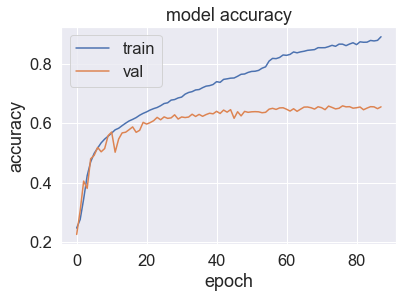

In [38]:
from matplotlib import pyplot as plt

# summarize history for accuracy
#plt.plot(history['accuracy'], color='b', label='Training')
#plt.plot(history['val_accuracy'], color='g', label='Validation')
#plt.title('Accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(loc='upper left')
#plt.show()

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

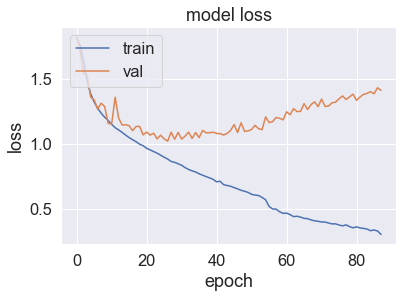

In [39]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

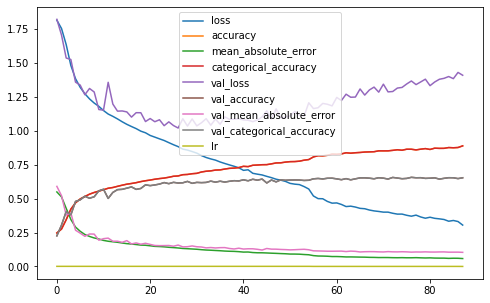

In [64]:
pd.DataFrame(history).plot(figsize=(8,5))
plt.show()

In [14]:
from tensorflow.keras import metrics
import sklearn
from sklearn.metrics import confusion_matrix

sklearn.metrics.confusion_matrix(true_y, pred_y)

array([[244,   9,  55,  23,  68,  15,  53],
       [  8,  38,   0,   4,   5,   0,   1],
       [ 33,   6, 241,  21,  93,  37,  65],
       [ 10,   0,  21, 761,  27,  15,  61],
       [ 51,   1,  72,  43, 366,   6, 114],
       [  6,   0,  38,  19,  13, 326,  13],
       [ 26,   1,  39,  59,  93,   4, 385]], dtype=int64)

In [15]:
df_confusion = pd.crosstab(true_y,pred_y, rownames=["Actual"], colnames=["Predicted"], margins= True)

AssertionError: arrays and names must have the same length

In [16]:
print(df_confusion)

NameError: name 'df_confusion' is not defined

[Text(0.5, 106.421875, 'Predicted label'), Text(106.421875, 0.5, 'True label')]

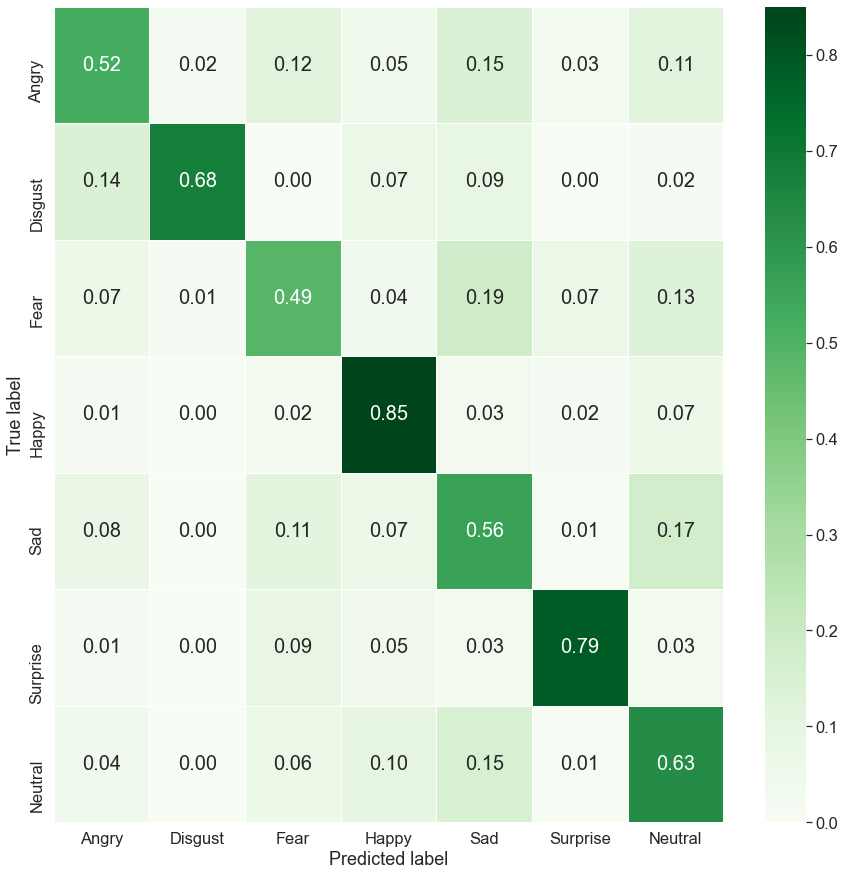

In [22]:
#y_pred = model.predict_classes(X_test)
#y_true = np.asarray([np.argmax(i) for i in test_y])

from sklearn.metrics import confusion_matrix
import seaborn as sns


emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
cm = confusion_matrix(true_y, pred_y)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cm_normalised, annot=True, linewidths=1, square=False, 
                    cmap="Greens", yticklabels=emotion_labels, xticklabels=emotion_labels, vmin=0, vmax=np.max(cm_normalised), 
                    fmt=".2f", annot_kws={"size": 20})
ax.set(xlabel='Predicted label', ylabel='True label')